In [90]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Transformers
from sklearn.preprocessing import StandardScaler


# Loading our Data

In [54]:
tb_bike = pd.read_csv("data/tb_bikeshare.csv", parse_dates=["started_at", "ended_at"])


In [55]:
tb_bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355850 entries, 0 to 355849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   started_at        355850 non-null  datetime64[ns]
 1   ended_at          355850 non-null  datetime64[ns]
 2   start_lat         355850 non-null  float64       
 3   start_lng         355850 non-null  float64       
 4   end_lat           355850 non-null  float64       
 5   end_lng           355850 non-null  float64       
 6   dur_minutes       355850 non-null  float64       
 7   len_meters        355850 non-null  float64       
 8   is_weekday        355850 non-null  int64         
 9   is_member         355850 non-null  int64         
 10  is_electric_bike  355850 non-null  int64         
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 29.9 MB


In [56]:
tb_bike.describe()


,start_lat,start_lng,end_lat,end_lng,dur_minutes,len_meters,is_weekday,is_member,is_electric_bike
count,355850.000000,355850.000000,355850.000000,355850.000000,355850.000000,355850.000000,355850.000000,355850.000000,355850.000000
mean,38.901067,-77.032876,38.899926,-77.032500,21.696120,1845.893555,0.276015,0.560236,0.077021
std,0.026576,0.032974,0.026242,0.032766,99.457022,1460.808350,0.447025,0.496359,0.266625
min,38.782551,-77.368416,38.782633,-77.368416,-0.100000,0.000000,0.000000,0.000000,0.000000
25%,38.888774,-77.045000,38.888774,-77.045000,7.000000,887.940818,0.000000,0.000000,0.000000
50%,38.901992,-77.032096,38.900880,-77.032008,12.200000,1531.186015,0.000000,1.000000,0.000000
75%,38.912644,-77.015966,38.910674,-77.013917,21.900000,2452.585087,1.000000,1.000000,0.000000
max,39.125828,-76.825535,39.125828,-76.825535,33968.316667,28817.046982,1.000000,1.000000,1.000000


The duration & lenght variables (`dur_minutes` & `len_meters`) appear to be suffering from some outliers. Let's use a simple 3-sigma interval to drop these outliers.

In [57]:
sig_len = tb_bike["len_meters"].std()
mu_len = tb_bike["len_meters"].mean()

len_inlier = (tb_bike["len_meters"] > (mu_len - 3 * sig_len)) & (
    tb_bike["len_meters"] < (mu_len + 3 * sig_len)
)


In [58]:
sig_dur = tb_bike["dur_minutes"].std()
mu_dur = tb_bike["dur_minutes"].mean()

dur_inlier = (tb_bike["dur_minutes"] > (mu_dur - 3 * sig_dur)) & (
    tb_bike["dur_minutes"] < (mu_dur + 3 * sig_dur)
)


In [59]:
tb_bike = tb_bike[(len_inlier) & (dur_inlier)].copy()
tb_bike.describe()


,start_lat,start_lng,end_lat,end_lng,dur_minutes,len_meters,is_weekday,is_member,is_electric_bike
count,349575.000000,349575.000000,349575.000000,349575.000000,349575.000000,349575.000000,349575.000000,349575.000000,349575.000000
mean,38.901010,-77.032562,38.900037,-77.032296,18.881135,1749.940661,0.274505,0.562048,0.075200
std,0.026027,0.032613,0.025723,0.032515,24.067996,1216.563924,0.446265,0.496136,0.263714
min,38.782551,-77.368416,38.782633,-77.368416,-0.100000,0.000000,0.000000,0.000000,0.000000
25%,38.889342,-77.044780,38.888774,-77.044789,6.933333,882.529680,0.000000,0.000000,0.000000
50%,38.902000,-77.032008,38.900930,-77.032008,11.983333,1506.259123,0.000000,1.000000,0.000000
75%,38.912630,-77.015360,38.910674,-77.013917,21.083333,2394.513554,1.000000,1.000000,0.000000
max,39.125828,-76.825535,39.125828,-76.825535,319.900000,6227.728578,1.000000,1.000000,1.000000


In [60]:
clu_vars = [
    "start_lat",
    "start_lng",
    "end_lat",
    "end_lng",
    "dur_minutes",
    "len_meters",
    "is_weekday",
    "is_member",
    "is_electric_bike",
]


Let

In [61]:
scaler = StandardScaler()
scaler.fit(tb_bike[clu_vars])

tb_sca_bike = pd.DataFrame(
    scaler.transform(tb_bike[clu_vars]), columns=scaler.feature_names_in_
)


# Using MDS to Explore k

In [62]:
from sklearn.manifold import MDS


In [68]:
tb_bike_sample = tb_sca_bike.sample(1000, random_state=11)
mds_fit = MDS()
tb_bike_sample[["MC_1", "MC_2"]] = mds_fit.fit_transform(tb_bike_sample)


<AxesSubplot:xlabel='MC_1', ylabel='MC_2'>

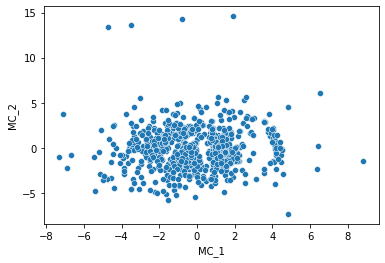

In [70]:
sns.scatterplot(data=tb_bike_sample, x="MC_1", y="MC_2")


# Applying KMeans

In [71]:
from sklearn.cluster import KMeans


In [72]:
km4_fit = KMeans(n_clusters=4)
km4_fit.fit(tb_sca_bike)


KMeans(n_clusters=4)

In [78]:
tb_bike["km4_clu"] = km4_fit.labels_
tb_sca_bike["km4_clu"] = km4_fit.labels_

In [80]:
tb_melt_bike = tb_sca_bike.melt(id_vars=["km4_clu"])


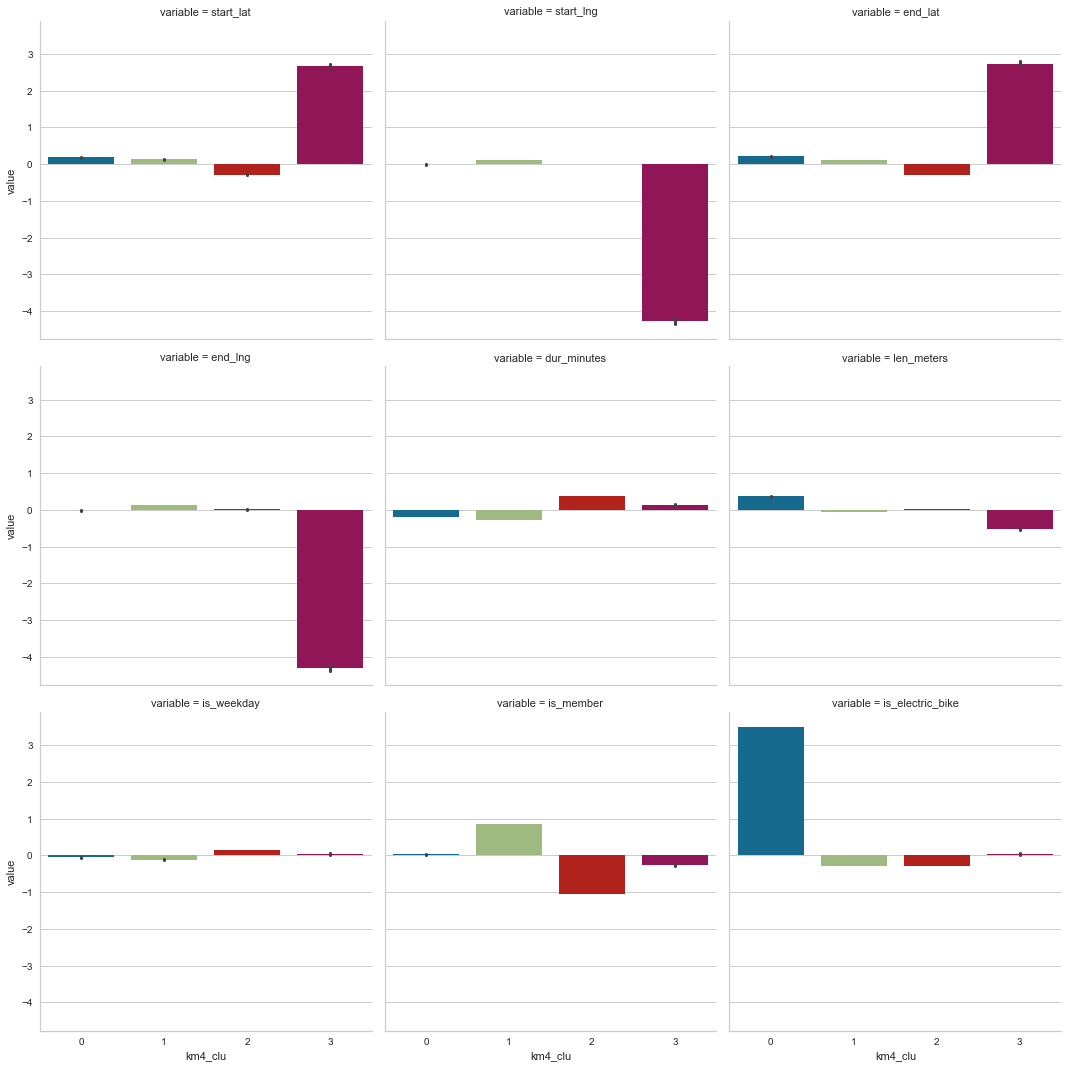

In [113]:
sns.catplot(
    data=tb_melt_bike, 
    x="km4_clu", y="value",
    col="variable", kind="bar", 
    col_wrap=3
)


## Using Inertia to Measure Cluster Coherence

In [88]:
km4_fit.inertia_

2161108.7534689996

In [92]:
inertia_list = []
for k in range(2, 11):
    km_fit = KMeans(n_clusters=k)
    km_fit.fit(tb_sca_bike)
    inertia_list.append(km_fit.inertia_)

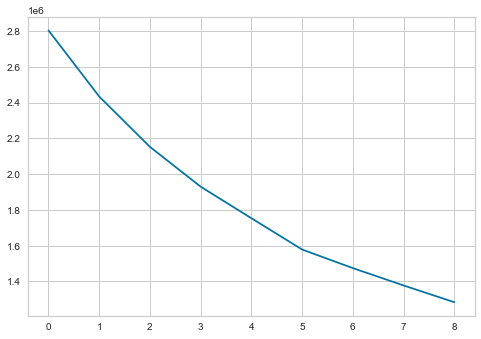

In [94]:
plt.plot(inertia_list)

!pip install yellowbrick

In [84]:
from yellowbrick.cluster import KElbowVisualizer

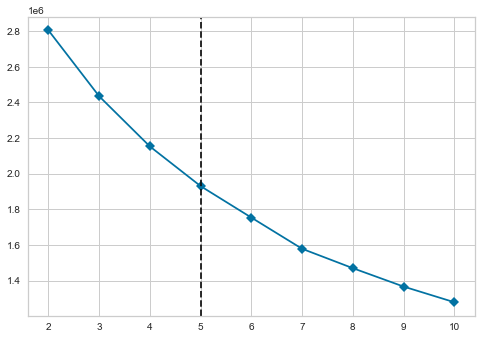

In [96]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False)

fit = km_opt.fit(tb_sca_bike)

# Using Silhouette to Measure Cluster Overlap

In [98]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [114]:
tb_sca_bike_sample = tb_sca_bike.sample(10000, random_state=42)

In [115]:
tb_sca_bike_sample['sil_k4'] = silhouette_samples(tb_sca_bike_sample[clu_vars], tb_sca_bike_sample['km4_clu'])

<AxesSubplot:xlabel='km4_clu', ylabel='sil_k4'>

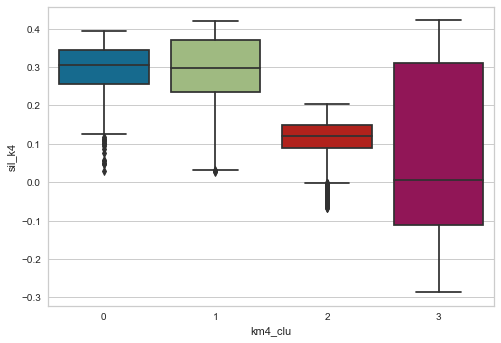

In [116]:
sns.boxplot(data = tb_sca_bike_sample, x = 'km4_clu', y = 'sil_k4')

In [119]:
tb_sca_bike_sample.groupby(['km4_clu'])['sil_k4'].mean().reset_index()

,km4_clu,sil_k4
0,0,0.293791
1,1,0.292316
2,2,0.113935
3,3,0.086253


In [128]:
list_sil = []
for k in range(2, 11):
    km_fit = KMeans(n_clusters=k)
    km_fit.fit(tb_sca_bike_sample[clu_vars])
    tb_sca_bike_sample['km_clu'] = km_fit.labels_
    tb_sca_bike_sample['sil'] = silhouette_samples(tb_sca_bike_sample[clu_vars], tb_sca_bike_sample['km_clu'])
    tb_sca_bike_sample['k'] = k
    sil_clu = tb_sca_bike_sample.groupby(['k', 'km_clu'])['sil'].mean().reset_index()
    list_sil.append(sil_clu)

We can use the **minimum average silhoutte** among clusters to evaluate a given `k`: we will be evaluating the separation of the least separated cluster found.

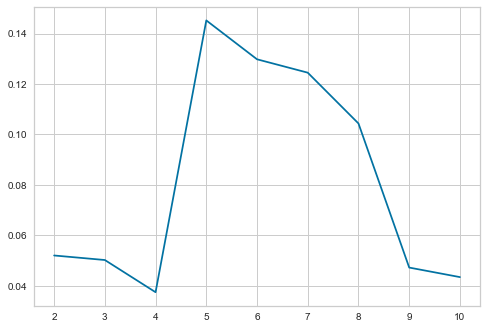

In [129]:
plt.plot(pd.concat(list_sil).groupby('k')['sil'].min())

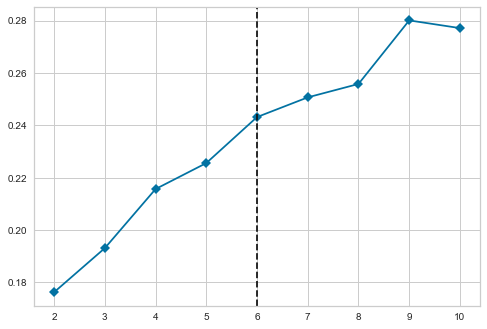

In [130]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False,  metric='silhouette')

fit = km_opt.fit(tb_sca_bike_sample[clu_vars])

# Using the CH Index to Evaluate Clusters

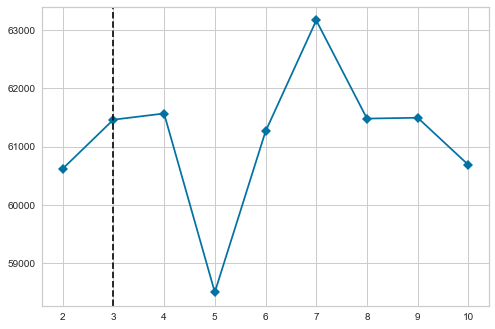

In [125]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(3, 11), timings = False,  metric='calinski_harabasz')

fit = km_opt.fit(tb_sca_bike)